In [1]:
import numpy as np
from ffn_tanh import TanhNet


In [2]:
def sample_covariance(neuron_one, trainpoint_one, neuron_two, trainpoint_two, yy):
    '''Sample covariance, formulas as in https://en.wikipedia.org/wiki/Sample_mean_and_covariance'''
    one = yy[:, neuron_one-1, trainpoint_one-1]
    two = yy[:, neuron_two-1, trainpoint_two-1]
    cov = np.cov(one, two)[0, 1]

    return cov


In [3]:
'''n0: # dimension of x
    nk: # hidden nodes
    nl: # dimension of y
    l: # number of layers
    nd: # number of points in train-set'''
n0,nk,nl,l=10000,10000,10000,10
nd = 2
'''experiments_number: # number of experiments'''
experiments_number = 10

testNet = TanhNet(n0=n0,nk=nk,nl=nl,l=l)
testNet.set_log_level("info")
testNet.set_gmetric_recording_indices([(1,1),(1,2),(2,2)])

xx = np.random.normal(size=(n0, nd)).astype(np.float32)
yy = np.zeros((experiments_number, nl, nd))
#weights distribution variances are set as in (5.138): σ_1=tanh'(0)=1, c^0_w=1/σ_1^2, 
#c^1_w=2/(3*σ_1^2), n_l=10000
cb, cw = 0, 1.0 + (2.0/(10000.0*3.0))

G01_records = []
G00_records = []
G11_records = []

#for each experiment re-initialisation of the weights with recalculation
for experiment_number in range(experiments_number):
    testNet.init_weights(cb, cw)
    res = testNet.forward(xx)
    yy[experiment_number] = res
    G00_records.append(testNet.get_gmetric(1,1).copy())
    G11_records.append(testNet.get_gmetric(2,2).copy())
    G01_records.append(testNet.get_gmetric(1,2).copy())
    
    print('-', end='')


FeedForwardNet created with n0=10000, nk=10000, nl=10000, l=10, bias_on=False
----------

In [4]:
for trainpoint1 in range(1, nd+1):
    for trainpoint2 in range(trainpoint1, nd+1):
        print("Metric (4.8) for trainpoint {} and trainpoint {}: {}"\
              .format(trainpoint1, trainpoint2, TanhNet.G_xx(xx[:,trainpoint1-1], xx[:,trainpoint2-1], cb, cw)))

Metric (4.8) for trainpoint 1 and trainpoint 1: 0.9823877537760416
Metric (4.8) for trainpoint 1 and trainpoint 2: 0.010941667201029459
Metric (4.8) for trainpoint 2 and trainpoint 2: 1.023348296796875


In [5]:
nll, ndd = 2,2
for neuron1 in range(1, nll+1):
      for neuron2 in range(neuron1, nll+1):
            for trainpoint1 in range(1, ndd+1):
                  for trainpoint2 in range(1 if neuron1 != neuron2 else trainpoint1, ndd+1):
                        print("Sample covariance between neuron {}, trainpoint {} and neuron {}, trainpoint {}: {}"\
                              .format(neuron1, trainpoint1, neuron2, trainpoint2\
                                      , sample_covariance(neuron1,trainpoint1,neuron2,trainpoint2,yy)))

Sample covariance between neuron 1, trainpoint 1 and neuron 1, trainpoint 1: 0.03210235967728813
Sample covariance between neuron 1, trainpoint 1 and neuron 1, trainpoint 2: -0.03913170088321026
Sample covariance between neuron 1, trainpoint 2 and neuron 1, trainpoint 2: 0.08600234124028173
Sample covariance between neuron 1, trainpoint 1 and neuron 2, trainpoint 1: 0.0036484899943011392
Sample covariance between neuron 1, trainpoint 1 and neuron 2, trainpoint 2: -0.021192762924251433
Sample covariance between neuron 1, trainpoint 2 and neuron 2, trainpoint 1: -0.011237631499015912
Sample covariance between neuron 1, trainpoint 2 and neuron 2, trainpoint 2: 0.0484355744729061
Sample covariance between neuron 2, trainpoint 1 and neuron 2, trainpoint 1: 0.08769874013677983
Sample covariance between neuron 2, trainpoint 1 and neuron 2, trainpoint 2: 0.008205542585947755
Sample covariance between neuron 2, trainpoint 2 and neuron 2, trainpoint 2: 0.06445384944077957


In [6]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'G01')

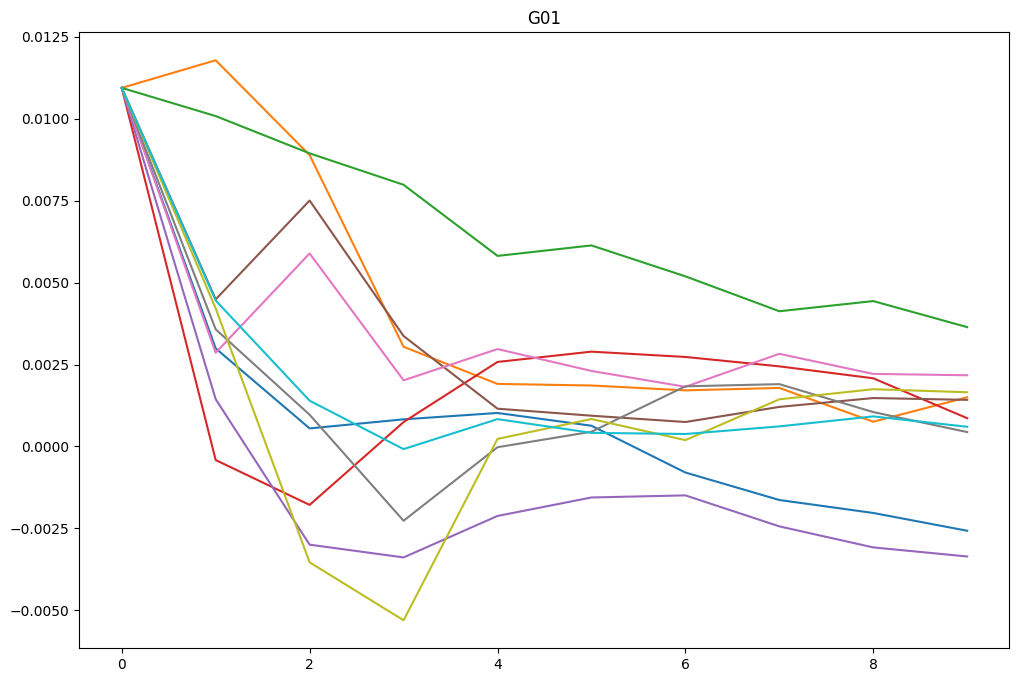

In [7]:
plt.figure(figsize=(12, 8))
for i, Gs in enumerate(G01_records):
    plt.plot(Gs, label=f"experiment {i}")
#plt.legend()
plt.title("G01")

Text(0.5, 1.0, 'G00')

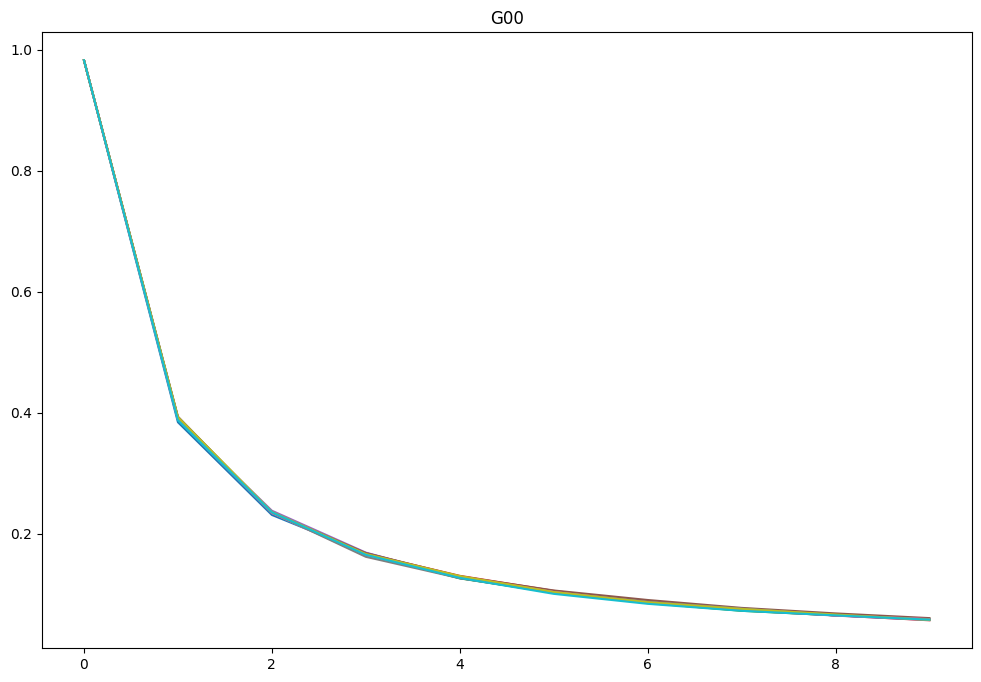

In [8]:
plt.figure(figsize=(12, 8))
for i, Gs in enumerate(G00_records):
    plt.plot(Gs, label=f"experiment {i}")
#plt.legend()
plt.title("G00")

Text(0.5, 1.0, 'G11')

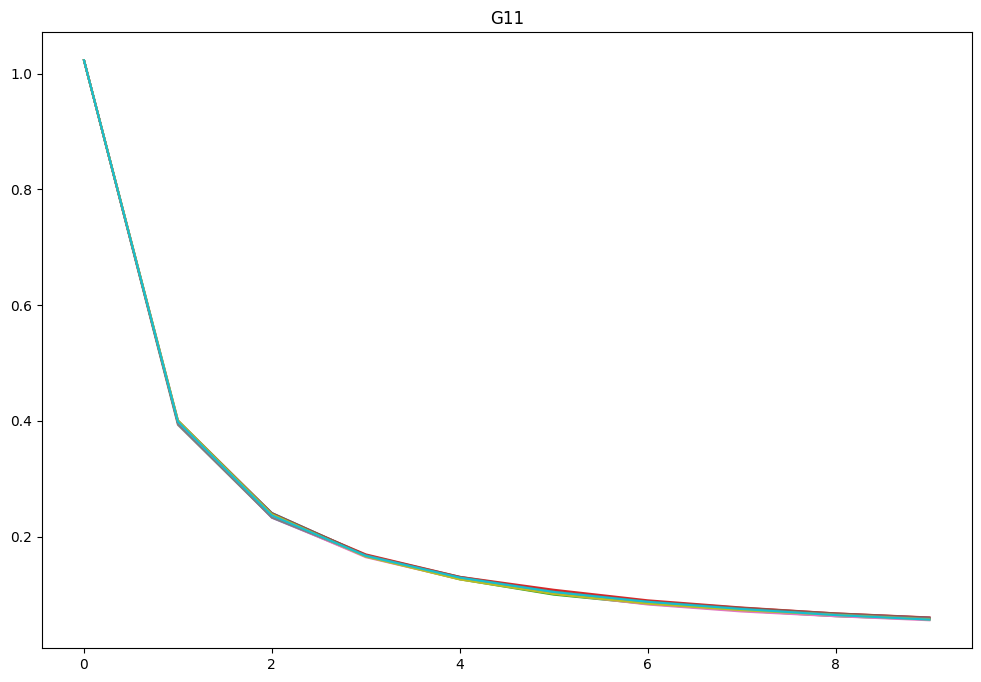

In [9]:
plt.figure(figsize=(12, 8))
for i, Gs in enumerate(G11_records):
    plt.plot(Gs, label=f"experiment {i}")
#plt.legend()
plt.title("G11")